In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup


In [2]:
url = 'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000&punto=indice'

r = requests.get(url).text
soup = BeautifulSoup(r, 'lxml')
tabla = soup.findAll('table', id='ctl00_Contenido_tblAcciones')

In [3]:
df = pd.read_html(str(tabla))[0]
df['% Dif.'] = df['% Dif.'].apply(lambda x: x/100)
df

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,1480000,-0.07,1496000,1470000,93.272,"13.832,86",14/09/2021,Cierre
1,ACERINOX,111850,-1.50,113950,111750,998.009,"11.224,32",14/09/2021,Cierre
2,ACS,233500,-0.21,236700,232200,488.629,"11.440,83",14/09/2021,Cierre
3,AENA,1323000,-0.90,1338500,1318500,70.876,"9.393,21",14/09/2021,Cierre
4,ALMIRALL,141200,1.29,141600,138600,189.650,"2.655,73",14/09/2021,Cierre
5,AMADEUS,510400,-1.85,521000,506400,1.096.653,"56.335,13",14/09/2021,Cierre
6,ARCELORMIT.,275000,-1.45,278950,273350,352.420,"9.717,44",14/09/2021,Cierre
7,B.SANTANDER,30910,-0.74,31480,30760,31.401.860,"97.675,57",14/09/2021,Cierre
8,BA.SABADELL,5958,-0.83,6078,5954,21.632.232,"13.003,52",14/09/2021,Cierre
9,BANKINTER,49300,-0.26,49950,49070,2.615.847,"12.948,60",14/09/2021,Cierre


<AxesSubplot:xlabel='Nombre'>

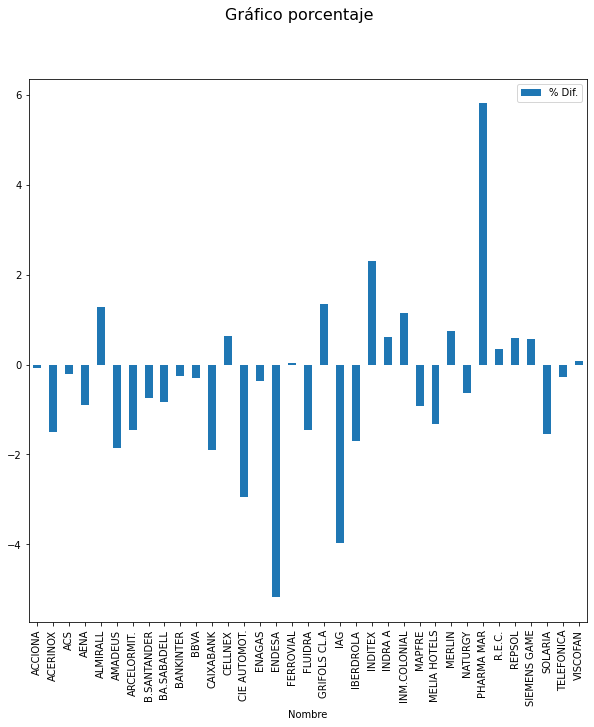

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Gráfico porcentaje', fontsize=16)
df.plot(kind='bar', y='% Dif.', x='Nombre', ax=ax)

In [5]:
links = []
for td in tabla[0].find_all('a'):
    links.append(td['href'].split('?')[1])

In [6]:
url_ = 'https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?'
data_frames = []
head = ['Cierre', 'Referencia', 'Último', 'Máximo', 'Mínimo', 'Medio']

for l in links:
    r = requests.get(url_+l).text
    soup2 = BeautifulSoup(r, 'lxml')
    tabla = soup2.findAll('table', id='ctl00_Contenido_tblDatos')
    data_frames.append(pd.read_html(str(tabla))[0])
    for h in head:
        data_frames[-1][h] = data_frames[-1][h].apply(lambda x: x/1000)


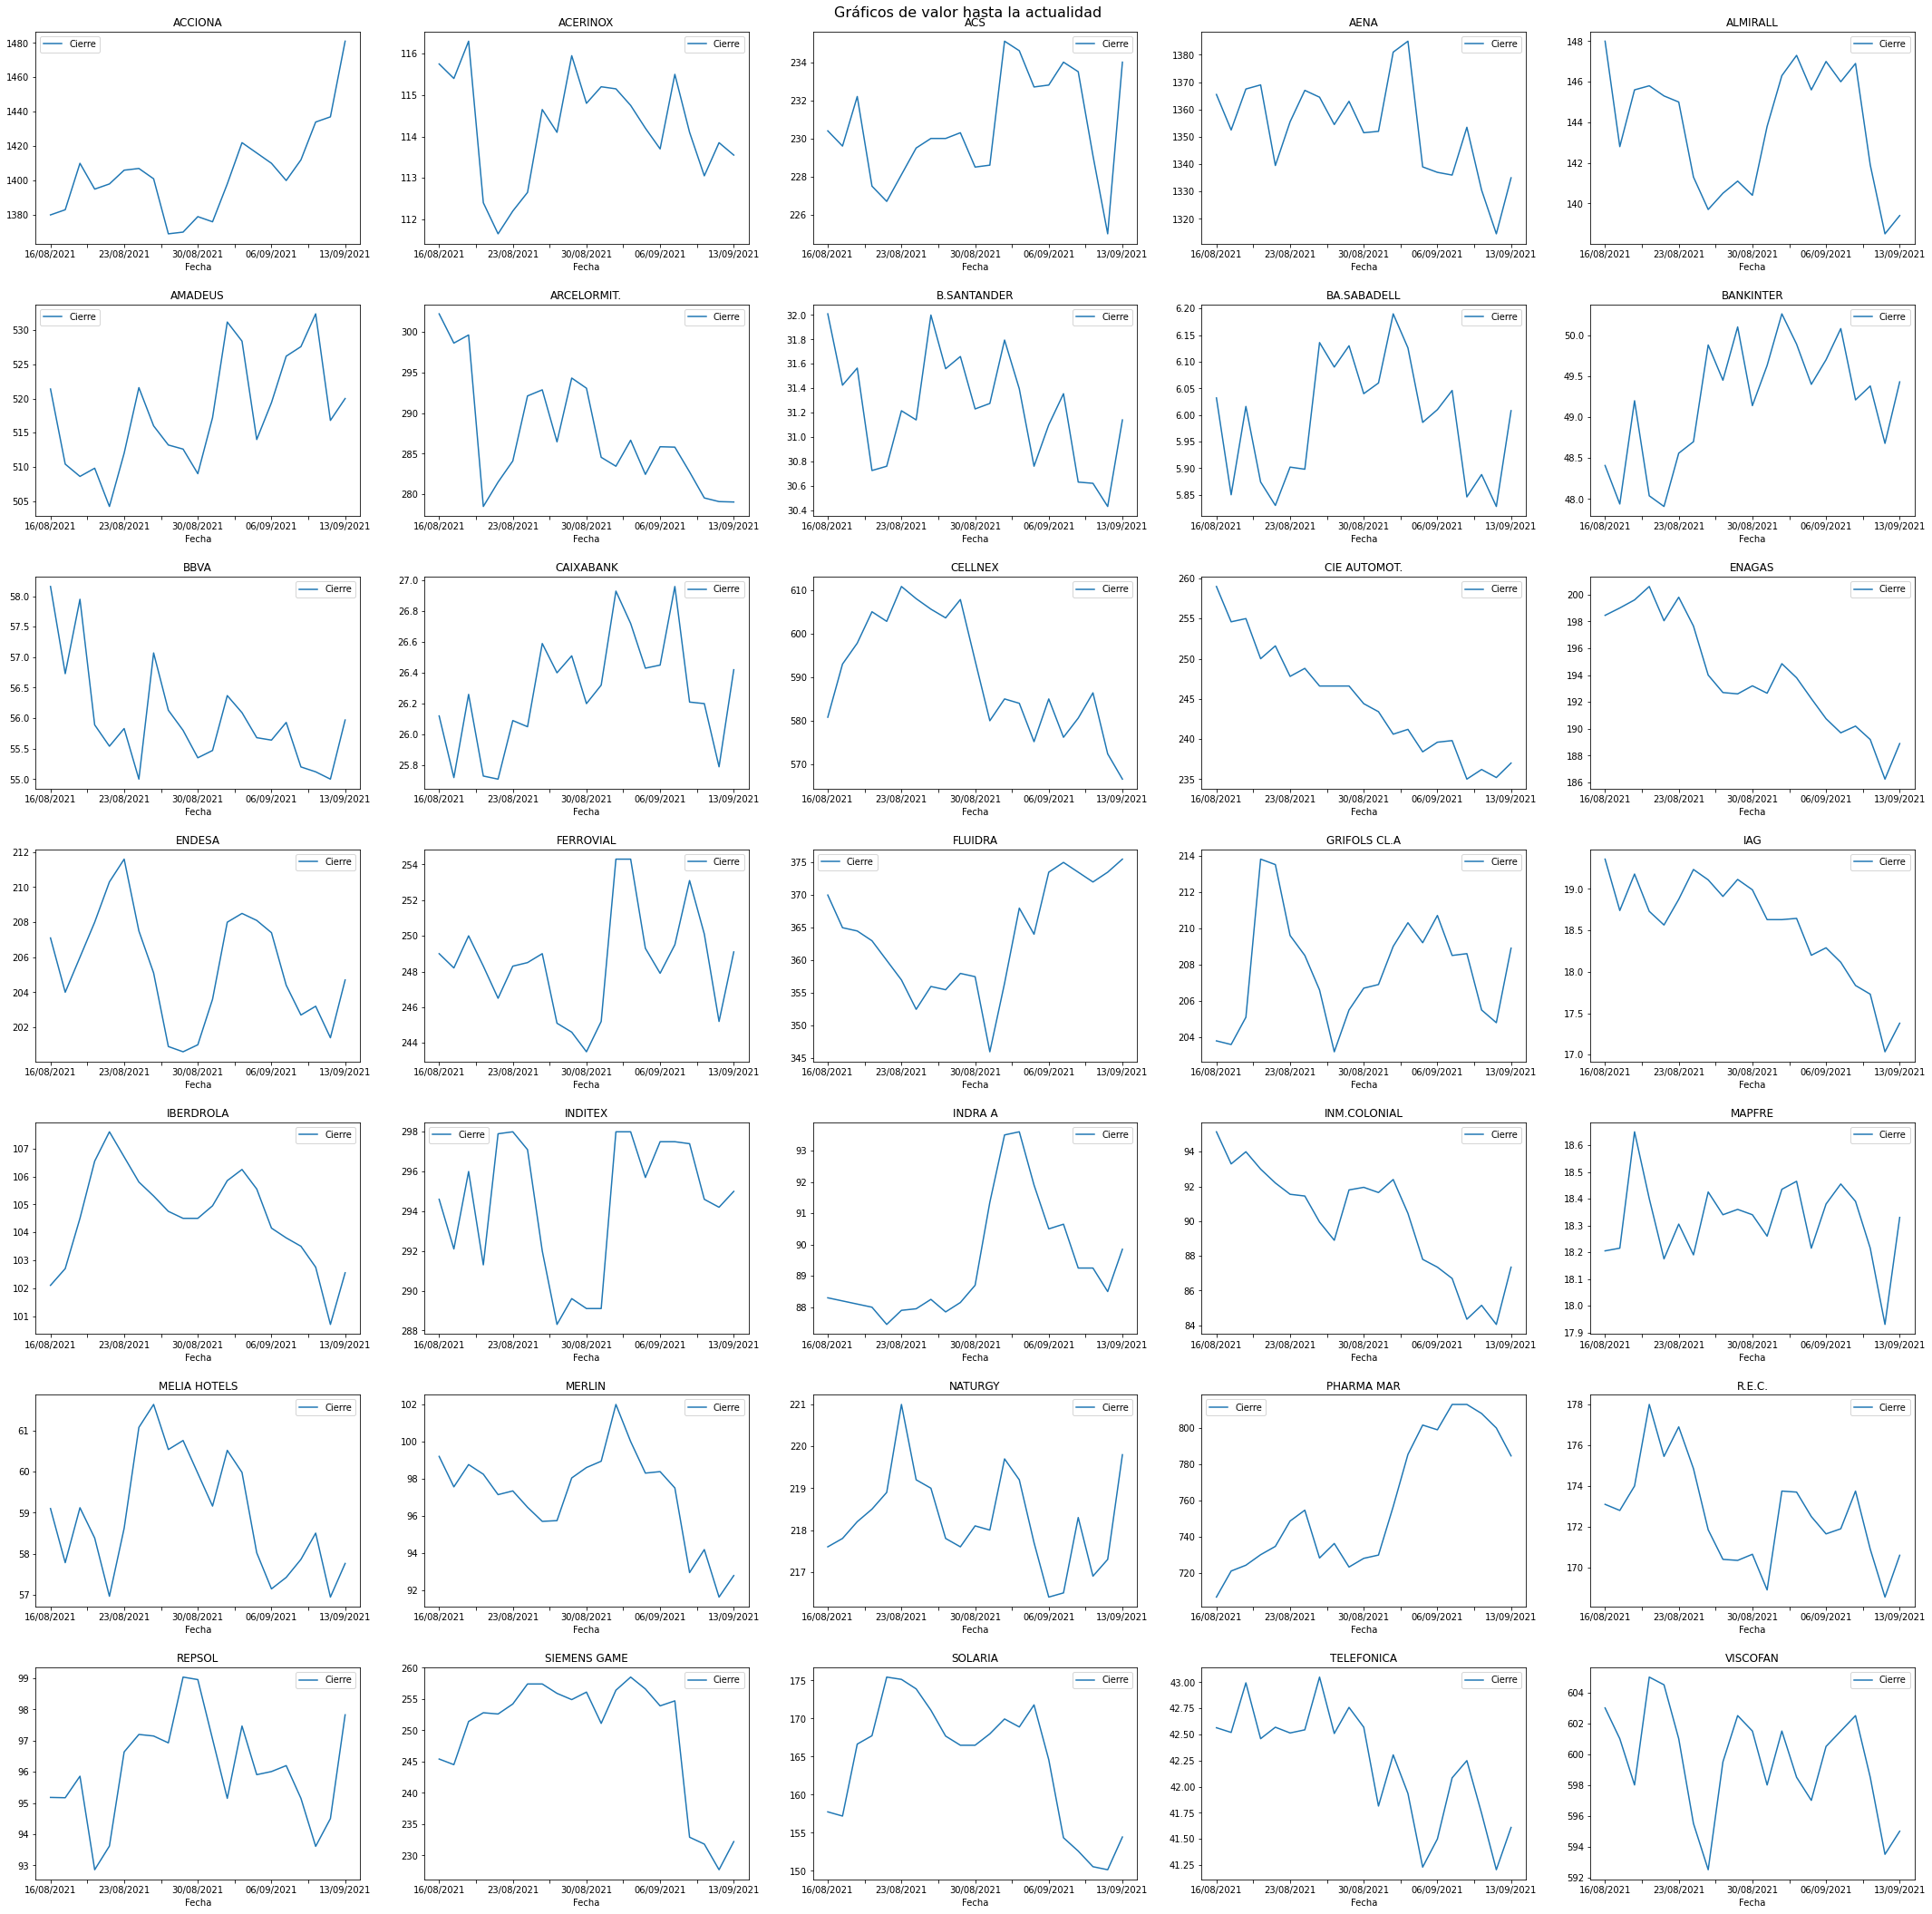

In [7]:
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(30, 30))
fig.suptitle('Gráficos de valor hasta la actualidad', fontsize=16)
for i in range(len(data_frames)):
    axe = plt.subplot(7, 5, i+1)
    axe.set_title(df['Nombre'][i])
    data_frames[i].plot(kind='line', y='Cierre', x='Fecha', ax=axe)
fig.tight_layout(pad=2.0)
